In [1]:
#!pip install matplotlib
#!pip install pyspellchecker

In [2]:
# load basic jupyter notebook libraries and namespace
%pylab inline


import pandas as pd # data manipulation
import nltk # natural language processing toolkit

pd.set_option('display.max_colwidth', -1) # fixes column width issue
plt.rcParams.update({'font.size': 14}) # customize plots

Populating the interactive namespace from numpy and matplotlib


C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(n=3)

,Unnamed: 0,Target,Prescription
0,0,5,"Renal abscess in children. Three cases of renal abscesses in children are described to illustrate the variable presenting features. An additional 23 pediatric cases, reported over the past ten years, were reviewed for clinical features and therapy. Fever, loin pain, and leukocytosis were common presenting features, but less than half of all abscesses were associated with either an abnormal urinalysis or a positive urine culture. The presenting features were sometimes confused with appendicitis, peritonitis, or a Wilms tumor. An organism was identified in 17 cases--Escherichia coli in 9 children and Staphylococcus aureus in 8 children. The majority of E. coli infections occurred in girls and the majority of S. aureus infections occurred in boys. Reflux was documented in 5 patients, and 2 children had a possible extrarenal source of infection. Antibiotics alone produced a cure in 10 children (38%), but 16 children (62%) required a surgical procedure."
1,1,2,"Hyperplastic polyps seen at sigmoidoscopy are markers for additional adenomas seen at colonoscopy. Asymptomatic individuals undergoing screening flexible sigmoidoscopy were prospectively studied. Polyps were found in 185 subjects. The endoscopist recorded an opinion on the polyps' histology based on endoscopic appearance. No polyps were removed at sigmoidoscopy. All subjects with rectosigmoid polyps then underwent colonoscopy and polypectomy. Of them, 99 subjects (54%) had at least one rectosigmoid adenoma, 69 (37%) had only hyperplastic polyps, and 17 (9%) had other findings. The endoscopists' opinion of the histopathology of polyps at sigmoidoscopy was correct for 61% of the lesions. Of subjects with adenomatous rectosigmoid polyps, 29% had additional adenomas at more proximal sites. Proximal adenomas were found in 28% of patients with hyperplastic rectosigmoid polyps. Patients with rectosigmoid hyperplastic polyps had the same risk for additional proximal adenomas as patients with rectosigmoid adenomatous polyps."
2,2,5,"Subclavian artery to innominate vein fistula after insertion of a hemodialysis catheter. Insertion of hemodialysis catheters for temporary use is now preferentially performed by percutaneous infraclavicular subclavian vein catheterization. This method involves passage of a stiff dilator and a peel-away sheath over a guide wire, and is usually carried out without fluoroscopy. For the most part this has proved to be a valuable and safe approach. However, a small incidence of major complications occurs, which needs to be emphasized. Sixteen cases of arteriovenous fistulas between the subclavian artery or its branches and the subclavian vein have been reported so far in the literature. To date only one case of subclavian artery to innominate vein fistula has been reported. We report the second case with this complication and suggest possible preventive measures."


In [5]:
# print total number of rows for data
print(len(df.index))

14437


# Pre-processing

In [6]:
df.drop_duplicates(subset='Prescription',inplace=True)
df = df.reset_index()
print(len(df.index))

11227


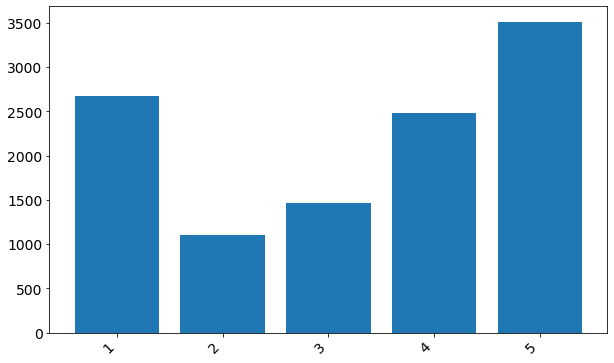

In [7]:
#class record counts from the dataset
counts = df['Target'].value_counts()
plt.figure(figsize=(10,6));
plt.bar(counts.index,counts.values);
plt.xticks(rotation=45,ha='right');

In [8]:
#word tokenizing
nltk.download('punkt')
# select random sentence
sentence = df.sample(n=1)['Prescription'].values[0]
# create tokens from sentence
tokens = nltk.word_tokenize(sentence)
# create tagged sentence
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
print(sentence)

Spontaneous splenic rupture following infectious mononucleosis. Four cases of spontaneous splenic rupture after infectious mononucleosis (IM) have been treated at this institution since 1978. The condition is rare, occurring in 0.1-0.5 per cent of patients with proven infectious mononucleosis. Splenectomy is considered the treatment of choice for these patients. However, because recent trends in the management of traumatic splenic rupture are moving towards nonoperative treatment with selected patients, a similar approach has been considered for the patient with spontaneous splenic rupture following IM. The major reason for avoiding splenectomy is the increased incidence of sepsis in splenectomized patients. Yet, splenic rupture is accompanied by hemorrhage and the risks associated with blood transfusion for ongoing hemorrhage are of similar magnitude as those of sepsis following splenectomy. In addition, the grossly abnormal spleens seen at operation tend to include large, contained h

# Text-cleaning

In [10]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

wnl = WordNetLemmatizer()

from spellchecker import SpellChecker
import string
spell = SpellChecker()

nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def correct_spelling(word):
    return spell.correction(word)

def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def replace_newline(word):
    return word.replace('\n','')

In [12]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number, 
                      correct_spelling,
                      remove_punctuation]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [13]:
df = df.reset_index()  # make sure indexes pair with number of rows
for index, row in df.iterrows():
    df.at[index,'Prescription']  = clean_up_pipeline(row['Prescription'])

In [14]:
sentence = df.sample(n=1)['Prescription'].values[0]
print(f"After cleaning the text:  {sentence}")

After cleaning the text:  clinical interaction of salt and weight change on blood pressure level studies that examine the effect of altered body weight or dietary sodium on blood pressure level are reviewed emphasis is placed on studies that compare the effects of weight reduction or sodium restriction in separate comparison groups or analyze the independent effect of the two intervention modalities in multiple regression analysis additional analyses of the hypertension prevention trial data are presented most studies where comparison can be made suggest a greater effect for weight reduction than for the achieved moderate or shortterm reduction in sodium intake on subsequent lowering of blood pressure the lowering effect on blood pressure of weight reduction is independent of the effect of dietary sodium restriction however longterm over a year substantial reductions up to  meqday of dietary sodium have not been achieved in comparative trials nor are the effects of combined weight and 

# Vector representations of prescriptions

In [15]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Step 1. Load the data
documents = df['Prescription'].values

In [17]:
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. 
# That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

In [18]:
# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

In [19]:
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(n=6)

,aa,aaa,aab,aactivated,aaem,aag,aah,aai,aapo,aarm,...,zymodeme,zymodemes,zymogen,zymogens,zymograms,zymography,zymosan,zymosanactivated,zymosanstimulated,zzygos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df.Prescription)
X = matrix
y = df['Target']

In [21]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({5: 2477, 1: 1867, 4: 1708, 3: 1042, 2: 764})
Testing target statistics: Counter({5: 1033, 1: 806, 4: 769, 3: 427, 2: 334})


# Random oversampling for dataset balancing

In [22]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({4: 2477, 3: 2477, 1: 2477, 5: 2477, 2: 2477})
Testing target statistics: Counter({5: 1033, 1: 806, 4: 769, 3: 427, 2: 334})


In [23]:
# load necessary sci-kit learn methods
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
# create train data and target data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# generate data
target = le.fit_transform(df['Target'].values)
data = df['Prescription'].values
classes = le.classes_

# print results
print('# of classes: {}'.format(len(classes)))
print('Fitted classes:')
print(classes)

# of classes: 5
Fitted classes:
[1 2 3 4 5]


In [25]:
def plot_comparison_classes(y_test,y_train):
    '''Plot comparison of occurances for each class between test and train
    '''
    plt.figure(figsize=(10,6));
    width = 0.35
    unique, counts = np.unique(y_test, return_counts=True)
    plt.bar(unique,counts/np.sum(counts),width,label='test');

    unique, counts = np.unique(y_train, return_counts=True)
    plt.bar(unique+width,counts/np.sum(counts),width,label='train');

    plt.xlabel('Class'); plt.ylabel('Occurance'); plt.legend();

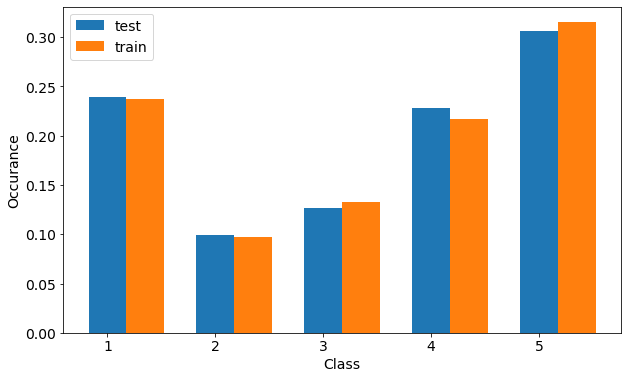

In [26]:
plot_comparison_classes(y_test,y_train)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, stratify=target,random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 10104
Testing data size: 1123


In [28]:
# The sci-kit learn Pipeline class can combine pre-processing and model fitting together.
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [29]:
# fit the training data
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [30]:
# predict on the validation data and calculate the accuracy
predicted = text_clf.predict(X_test)
val_acc = np.mean(predicted == y_test) 
print('Validation accuracy: {:.2%}'.format(val_acc))

Validation accuracy: 58.86%


In [31]:
from sklearn.metrics import classification_report
labels=["Neoplasms","Digestive system","Nervous system","Cardiovascular","General pathological"]
print(classification_report(y_test, predicted, target_names=labels))

                      precision    recall  f1-score   support

           Neoplasms       0.81      0.76      0.78       267
    Digestive system       0.00      0.00      0.00       110
      Nervous system       1.00      0.01      0.03       147
      Cardiovascular       0.78      0.67      0.72       248
General pathological       0.44      0.82      0.57       351

            accuracy                           0.59      1123
           macro avg       0.61      0.45      0.42      1123
        weighted avg       0.63      0.59      0.53      1123



C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
def print_class_prediction(sentence,clf=text_clf):
    '''For a sentence and classifier, classify the sentence and then show the estimated probabilities
    for each class as a bar chart.
    '''
    probs = clf.predict_proba([sentence]).flatten()

    classes = le.classes_
    x = np.arange(len(classes))

    plt.figure(figsize=(10,6));
    plt.grid(True,axis='y');
    plt.bar(x,probs);
    plt.xticks(x,classes,rotation=45,ha='right',fontsize=14);

    ind = np.argmax(probs)
    max_prob = probs[ind]
    max_class = classes[ind]
    plt.title('Predicted condition : {}, confidence {:.2%}'.format(max_class,max_prob),fontsize=14)

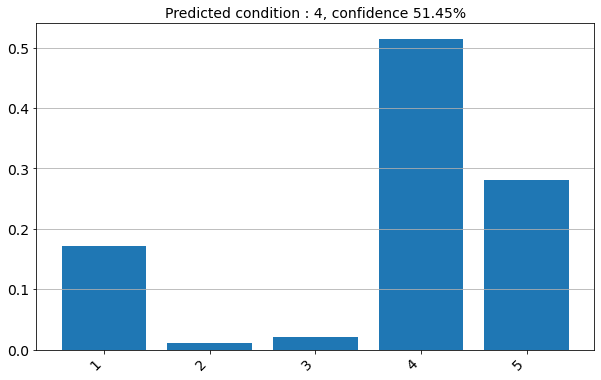

In [33]:
example_sentence = "Real-time ultrasound for the detection of deep venous thrombosis. PURPOSE: Accurate diagnosis of deep venous thrombosis (DVT) is a clinical problem in emergency practice. A prospective trial was conducted comparing real-time ultrasound with contrast venography in the diagnosis of proximal DVT. METHODS: Seventy patients whose clinical presentations mandated diagnostic evaluation for DVT had real-time ultrasound of the involved leg followed by contrast venography. Initial readings of ultrasound and venography were compared with each other and with final readings to assess reliability of interpretation. RESULTS: Final ultrasound readings agreed with final venogram readings in all patients. Negative initial ultrasound readings agreed with final venogram readings in 56 of 56 patients (negative predictive value, 100%; 95% confidence interval, 94 to 100). Eighteen patients had positive initial ultrasound readings compared with 14 who had positive final venogram readings (positive predictive value, 78%; 95% confidence interval, 55 to 91). CONCLUSION: Negative real-time ultrasonography reliably excludes proximal DVT. Positive ultrasound reliably diagnoses proximal DVT only in experienced hands. "
print_class_prediction(example_sentence)

Sentence: 
trisomy  a new recurring chromosome abnormality in acute leukemia a new recurring chromosome abnormality was identified in  of  consecutive successfully karyotyped adults with de novo acute leukemia these eight patients had trisomy  as the sole cytogenetic abnormality on central morphologic review five cases were classified as subtypes of acute myeloid leukemia one as acute mixed lymphoid and myeloid leukemia one as acute lymphoid leukemia and one as acute undifferentiated leukemia blasts of all eight cases expressed one or more myeloid differentiation antigens three also expressed tlineageassociated antigens however none of these had rearrangement of the tcell receptor beta gamma or delta genes four of six cases tested were tdt positive all eight patients with trisomy  were treated with intensive induction chemotherapy only three entered a shortlived complete remission survival of patients with trisomy  ranged from  to  months and was significantly shorter than that of the 

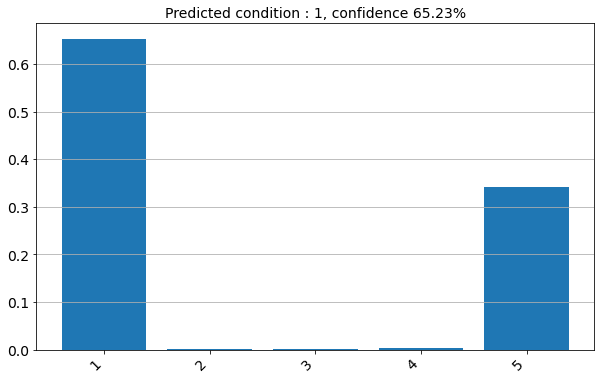

In [34]:
# Find a random incorrectly labelled sentence and check the prediciton using the print_class_prediction method
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(len(incorrect_y))
incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform([incorrect_y[ind]])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print_class_prediction(incorrrectly_labeled_sentence)

In [35]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [36]:
wnl = WordNetLemmatizer()

In [37]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [wnl.lemmatize(wnl.lemmatize(t,'v'),'n') for t in word_tokenize(doc)]
    
text_lemma_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [38]:
# fit the new classifier
text_lemma_clf.fit(X_train, y_train) 

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x0000019106296F98>)),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [39]:
labels=["Neoplasms","Digestive system","Nervous system","Cardiovascular","General pathological"]
print(classification_report(y_test, predicted, target_names=labels))

                      precision    recall  f1-score   support

           Neoplasms       0.81      0.76      0.78       267
    Digestive system       0.00      0.00      0.00       110
      Nervous system       1.00      0.01      0.03       147
      Cardiovascular       0.78      0.67      0.72       248
General pathological       0.44      0.82      0.57       351

            accuracy                           0.59      1123
           macro avg       0.61      0.45      0.42      1123
        weighted avg       0.63      0.59      0.53      1123



C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\.conda\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
def print_resampled_accuracy(predicted,y,samples=1000):
    '''Bootstrap confidence intervals for test accuracy
    '''
    from sklearn.utils import resample
    acc = []
    for _ in range(samples):
        r_p, r_y = resample(predicted, y)
        acc.append(np.mean(r_p == r_y))

    lc,m,uc = np.percentile(acc,[2.5,50.,97.5]);
    print('Accuracy : {:.2%} ({:.2%} - {:.2%})'.format(m,lc,uc))

In [41]:
# See the new accuracy on the test data
predicted = text_lemma_clf.predict(X_test)
 
print_resampled_accuracy(predicted,y_test)

Accuracy : 58.06% (55.12% - 60.91%)


In [42]:
print('Training data')
predicted = text_lemma_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 64.16% (63.23% - 65.07%)


trisomy  a new recurring chromosome abnormality in acute leukemia a new recurring chromosome abnormality was identified in  of  consecutive successfully karyotyped adults with de novo acute leukemia these eight patients had trisomy  as the sole cytogenetic abnormality on central morphologic review five cases were classified as subtypes of acute myeloid leukemia one as acute mixed lymphoid and myeloid leukemia one as acute lymphoid leukemia and one as acute undifferentiated leukemia blasts of all eight cases expressed one or more myeloid differentiation antigens three also expressed tlineageassociated antigens however none of these had rearrangement of the tcell receptor beta gamma or delta genes four of six cases tested were tdt positive all eight patients with trisomy  were treated with intensive induction chemotherapy only three entered a shortlived complete remission survival of patients with trisomy  ranged from  to  months and was significantly shorter than that of the remaining p

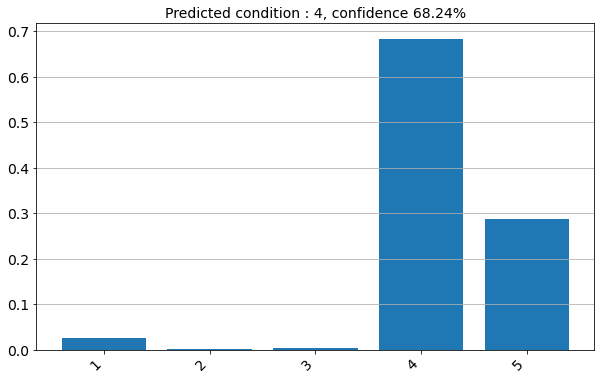

In [43]:
print(incorrrectly_labeled_sentence)
print_class_prediction(sentence,clf=text_lemma_clf)

In [44]:
from sklearn.ensemble import RandomForestClassifier
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=1000)),
])

In [45]:
text_rf_clf.fit(X_train, y_train) 

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001910616C8D0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=1000))])

In [46]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 100.00% (100.00% - 100.00%)


In [47]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 68.03% (65.27% - 70.88%)


In [48]:
labels=["Neoplasms","Digestive system","Nervous system","Cardiovascular","General pathological"]
print(classification_report(y_test, predicted, target_names=labels))

                      precision    recall  f1-score   support

           Neoplasms       0.78      0.86      0.82       267
    Digestive system       0.81      0.35      0.48       110
      Nervous system       0.76      0.33      0.46       147
      Cardiovascular       0.74      0.85      0.80       248
General pathological       0.54      0.68      0.60       351

            accuracy                           0.68      1123
           macro avg       0.73      0.61      0.63      1123
        weighted avg       0.70      0.68      0.67      1123



In [49]:
row = df.sample()
example_sentence = row['Prescription'].values[0]
condition = row['Target'].values[0]

cemented total knee arthroplasty for gonarthrosis in patients  years old or younger the results of  cemented total knee arthroplasties tkas in  patients with gonarthrosis who were  years old or younger at the time of surgery were reviewed these patients were operated on between  and  and were followed for an average of  years the average age of the patients was  years patients were evaluated by the hospital for special surgery knee score the average preoperative score was  and the average followup score was  overall  tkas were rated as excellent and  as good using the knee rating score advocated by the knee society the average postoperative score was  for pain and  for function there were four successful reoperations for patellar component loosening all in metalbacked patellae the femoral and tibial components in these patients were intact and at the followup period two knees were rated as excellent and two as good detailed roentgenographic evaluation demonstrated that  of tibial compo

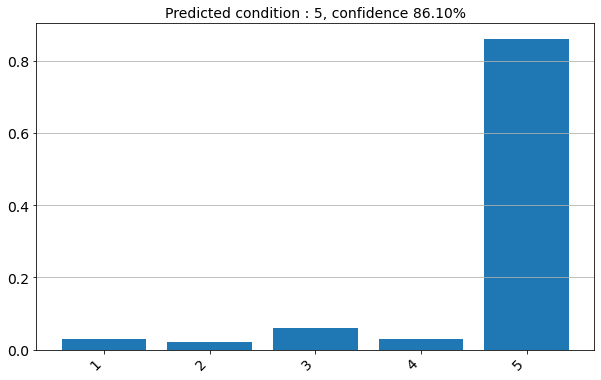

In [50]:
print(example_sentence)
print_class_prediction(example_sentence,clf=text_rf_clf)

Sentence: 
lack of association between keratoconus mitral valve prolapse and joint hypermobility the authors enrolled  patients with keratoconus and  matched controls in a crosssectional study to determine if mitral valve prolapse and hypermobile joints occur with greater frequency in individuals with keratoconus than in individuals without keratoconus the hypothesis that keratoconus may not be a distinct eye disease but a nonspecific sign representing a more generalized systemic disorder possibly a mild collagen tissue abnormality was considered mmode and two dimensional echocardiography and cardiac auscultation detected no statistically significant difference in the prevalence of mitral valve prolapse in patients with keratoconus compared with controls formal systematic examination of five joints also failed to detect a statistically significant difference in the prevalence of hypermobile joints in keratoconus patients and controls however as an ancillary finding a significantly high

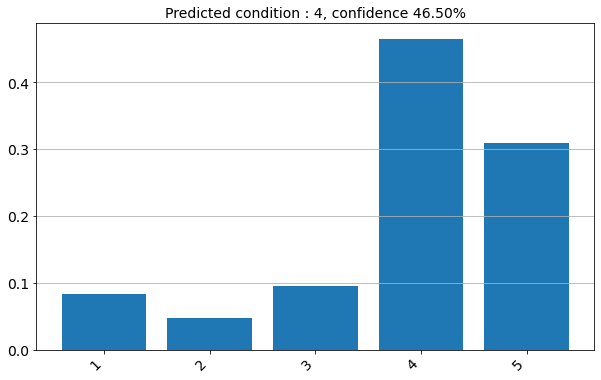

In [51]:
# get random incorrectly labelled sentence
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(0,len(incorrect_y))

incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform([incorrect_y[ind]])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print_class_prediction(incorrrectly_labeled_sentence,clf=text_rf_clf)

In [52]:
from sklearn.svm import SVC
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(decision_function_shape='ovo',kernel='sigmoid', gamma=1.0)),
])

In [53]:
text_rf_clf.fit(X_train, y_train) 

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001910BFAF630>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SVC(decision_function_shape='ovo', gamma=1.0,
                     kernel='sigmoid'))])

In [54]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 82.95% (82.25% - 83.66%)


In [55]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 69.46% (66.70% - 72.04%)


In [56]:
row = df.sample()
example_sentence = row['Prescription'].values[0]
condition = row['Target'].values[0]

In [57]:
print(example_sentence)
print_class_prediction(example_sentence,clf=text_rf_clf)

dietary salt and blood pressure a perspective although dietary salt restriction is often valuable as sole or adjunctive therapy of hypertensive disorders it is abundantly clear that hypertensive patients comprise a heterogeneous group with regard to salt sensitivity of blood pressure this is apparent despite the many methodological obstacles to defining salt sensitivity in an individual patient currently dietary trial is the only sure means of defining a given patient as responsive to salt restriction easily definable markers of salt sensitivity would allow appropriate targeting of this rather ponderous therapy promising leads include the assessment of membrane ion transporters such as sodiumlithium exchange and of the activity of the reninangiotensin system including the phenomenon of nonmodulating hypertension and other volume regulatory hormones such as atrial natriuretic factor although less intensively studied than in hypertensive patients the blood pressure response of normal sub

AttributeError: predict_proba is not available when  probability=False

In [58]:
labels=["Neoplasms","Digestive system","Nervous system","Cardiovascular","General pathological"]
print(classification_report(y_test, predicted, target_names=labels))

                      precision    recall  f1-score   support

           Neoplasms       0.77      0.82      0.79       267
    Digestive system       0.68      0.55      0.61       110
      Nervous system       0.66      0.60      0.63       147
      Cardiovascular       0.76      0.80      0.78       248
General pathological       0.60      0.61      0.61       351

            accuracy                           0.69      1123
           macro avg       0.69      0.68      0.68      1123
        weighted avg       0.69      0.69      0.69      1123



In [59]:
from sklearn.neighbors import KNeighborsClassifier
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf',  KNeighborsClassifier(n_neighbors=49)),
])

In [60]:
text_rf_clf.fit(X_train, y_train) 

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x000001910057DF28>)),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=49))])

In [61]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 68.40% (67.46% - 69.36%)


In [62]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 65.72% (63.05% - 68.48%)


In [63]:
row = df.sample()
example_sentence = row['Prescription'].values[0]
condition = row['Target'].values[0]

multisurface method of pattern separation for medical diagnosis applied to breast cytology multisurface pattern separation is a mathematical method for distinguishing between elements of two pattern sets each element of the pattern sets is comprised of various scalar observations in this paper we use the diagnosis of breast cytology to demonstrate the applicability of this method to medical diagnosis and decision making each of  cytological characteristics of breast fineneedle aspirates reported to differ between benign and malignant samples was graded  to  at the time of sample collection nine characteristics were found to differ significantly between benign and malignant samples mathematically these values for each sample were represented by a point in a ninedimensional space of real variables benign points were separated from malignant ones by planes determined by linear programming correct separation was accomplished in  of  samples  benign and  malignant in the one misclassified m

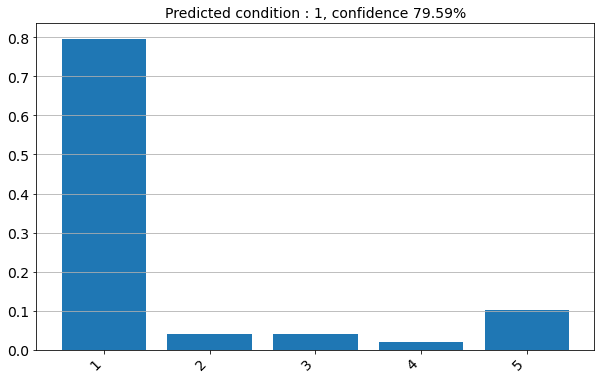

In [64]:
print(example_sentence)
print_class_prediction(example_sentence,clf=text_rf_clf)